In [174]:
import matplotlib
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.pyplot as plt
import pickle
import numpy as np


In [3]:
#sink_gas_and_star_data = pickle.load(open('./pickles/L5_8M_sink_data.pickle','rb'))
sink_gas_and_star_data = pickle.load(open('./pickles/L5_8M_sink_and_star_data.pickle', 'rb'))

In [4]:
def calculate_mass_thresh(sink_rad, dens_thresh):
    vol = (4./3) * np.pi * sink_rad**3
    mass_thresh = dens_thresh * vol
    mass_thresh_solar = mass_thresh * 5.0279e-34
    return mass_thresh_solar

mass_thresh = calculate_mass_thresh(2.636687e17, 6.772331e-20)
print mass_thresh

vol = 65 * (2.636687e17 / 2.5)**3
mass_cells = 6.772331e-20 * vol * 5.0279e-34
print mass_cells/mass_thresh

2.6145030378
0.993126844893


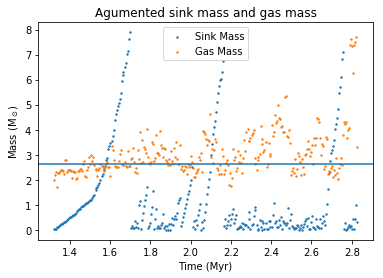

/Users/sean/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


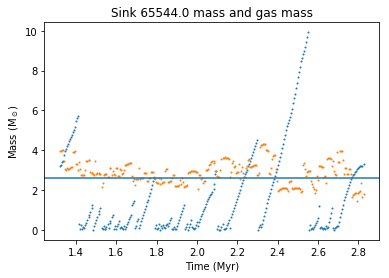

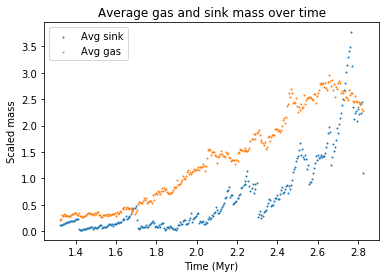

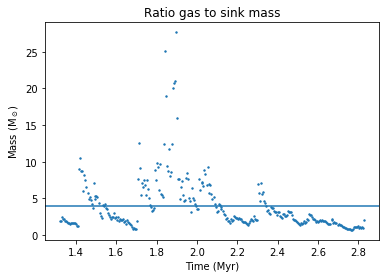

In [5]:
#print sink_gas_and_star_data['name']
#print sink_gas_and_star_data["sink_mass"].mean()


#sink_name = '65544.0'
sink_name = '65541.0'
plt.figure()
sink_array = np.where(sink_gas_and_star_data['name'] == sink_name)
#print sink_gas_and_star_data[sink_array]["sink_accr"][0]
plt.scatter(sink_gas_and_star_data[sink_array]["time"][0]*3.17098e-14, 
            sink_gas_and_star_data[sink_array]["sink_mass"][0]*5.0279e-34, 
            label='Sink Mass', 
            s=2)
plt.scatter(sink_gas_and_star_data[sink_array]["time"][0]*3.17098e-14, 
            sink_gas_and_star_data[sink_array]["gas_mass"][0]*5.0279e-34,
            label='Gas Mass', 
            s=2)
plt.axhline(y=mass_thresh)
plt.title('Agumented sink mass and gas mass')
plt.xlabel('Time (Myr)')
plt.ylabel('Mass (M$_\odot$)')
plt.legend()
plt.show()

#plt.figure()
#plt.scatter(sink_gas_and_star_data[sink_array]["time"][0]*3.17098e-14, sink_gas_data[sink_array]["sink_accr"][0],s=1)
#plt.show()

plt.figure()
sink_name = '65544.0'
sink_array = np.where(sink_gas_and_star_data['name'] == sink_name)
plt.scatter(sink_gas_and_star_data[sink_array]["time"][0]*3.17098e-14, 
            sink_gas_and_star_data[sink_array]["sink_mass"][0]*5.0279e-34,
            s=1)
plt.scatter(sink_gas_and_star_data[sink_array]["time"][0]*3.17098e-14, 
            sink_gas_and_star_data[sink_array]["gas_mass"][0]*5.0279e-34,
            s=1)
plt.axhline(y=mass_thresh)
plt.title('Sink 65544.0 mass and gas mass')
plt.xlabel('Time (Myr)')
plt.ylabel('Mass (M$_\odot$)')
plt.legend()
plt.show()

#ratio_gas_sink_mass = sink_gas_and_star_data["sink_mass"].mean()

plt.figure()
plt.scatter(sink_gas_and_star_data[sink_array]["time"][0]*3.17098e-14,
            sink_gas_and_star_data["sink_mass"].mean()*5.0279e-34,
            label='Avg sink',s=1)
plt.scatter(sink_gas_and_star_data[sink_array]["time"][0]*3.17098e-14,
            sink_gas_and_star_data["gas_mass"].mean()*5.0279e-34,
            label='Avg gas',
            s=1)
plt.title('Average gas and sink mass over time')
plt.xlabel('Time (Myr)')
plt.ylabel('Scaled mass')
plt.legend()
plt.show()

ratio_gas_to_sink = sink_gas_and_star_data["gas_mass"].mean()/sink_gas_and_star_data["sink_mass"].mean()
avg_ratio = ratio_gas_to_sink.mean()
plt.figure()
plt.scatter(sink_gas_and_star_data[sink_array]["time"][0]*3.17098e-14,
            ratio_gas_to_sink,
            s=2)
plt.axhline(y=avg_ratio)
plt.title('Ratio gas to sink mass')
plt.xlabel('Time (Myr)')
plt.ylabel('Mass (M$_\odot$)')
plt.legend()
plt.show()

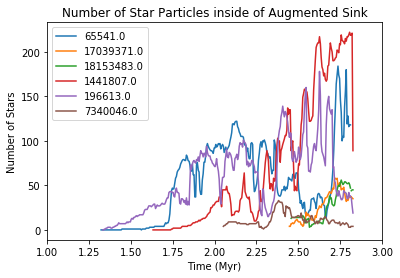

In [43]:
sink_name = '65541.0'
sink_name2 = '17039371.0'
sink_name3 = '18153483.0'
sink_name4 = '1441807.0'
sink_name5 = '196613.0'
sink_name6 = '7340046.0'

plt.figure()
sink_array = np.where(sink_gas_and_star_data['name'] == sink_name)
sink_array2 = np.where(sink_gas_and_star_data['name'] == sink_name2)
sink_array3 = np.where(sink_gas_and_star_data['name'] == sink_name3)
sink_array4 = np.where(sink_gas_and_star_data['name'] == sink_name4)
sink_array5 = np.where(sink_gas_and_star_data['name'] == sink_name5)
sink_array6 = np.where(sink_gas_and_star_data['name'] == sink_name6)

sink_17039371 = sink_gas_and_star_data[sink_array2]["time"][0]
sink_17039371[ sink_17039371==0.0 ] = np.nan
sink_18153483 = sink_gas_and_star_data[sink_array3]["time"][0]
sink_18153483[ sink_18153483==0.0 ] = np.nan
sink_1441807 = sink_gas_and_star_data[sink_array4]["time"][0]
sink_1441807[ sink_1441807==0.0 ] = np.nan
sink_196613 = sink_gas_and_star_data[sink_array5]["time"][0]
sink_196613[ sink_196613==0.0 ] = np.nan
sink_7340046 = sink_gas_and_star_data[sink_array6]["time"][0]
sink_7340046[ sink_7340046==0.0 ] = np.nan


plt.plot(sink_gas_and_star_data[sink_array]["time"][0][3:]*3.17098e-14,
            sink_gas_and_star_data[sink_array]["stars_in_sink"][0][3:],
            label=sink_name
            )
plt.plot(sink_17039371*3.17098e-14,
            sink_gas_and_star_data[sink_array2]["stars_in_sink"][0],
            label=sink_name2
            )
plt.plot(sink_gas_and_star_data[sink_array3]["time"][0]*3.17098e-14,
            sink_gas_and_star_data[sink_array3]["stars_in_sink"][0],
            label=sink_name3
            )
plt.plot(sink_gas_and_star_data[sink_array4]["time"][0]*3.17098e-14,
            sink_gas_and_star_data[sink_array4]["stars_in_sink"][0],
            label=sink_name4
            )
plt.plot(sink_gas_and_star_data[sink_array5]["time"][0]*3.17098e-14,
            sink_gas_and_star_data[sink_array5]["stars_in_sink"][0],
            label=sink_name5
            )
plt.plot(sink_gas_and_star_data[sink_array6]["time"][0]*3.17098e-14,
            sink_gas_and_star_data[sink_array6]["stars_in_sink"][0],
            label=sink_name6
            )
#plt.scatter(sink_gas_and_star_data[sink_array]["time"][0]*3.17098e-14,sink_gas_and_star_data["gas_mass"].mean()*5.0279e-34,label='Avg gas',s=1)
plt.xlim(1.0,3.0)
plt.title('Number of Star Particles inside of Augmented Sink')
plt.xlabel('Time (Myr)')
plt.ylabel('Number of Stars')
plt.legend()
plt.show()

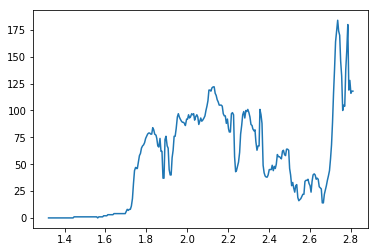

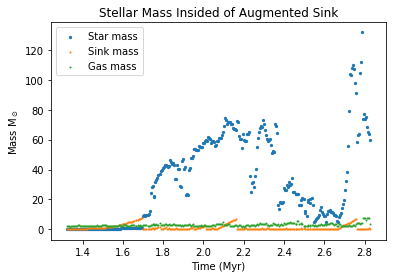

max stellar number density in sink:  70949.8935796 per pc^3
max stellar mass density in sink:  50808.5414371 Msun/pc^3
max total mass density in sink:  74013.3718349
mean gas dens:  1170.00196612


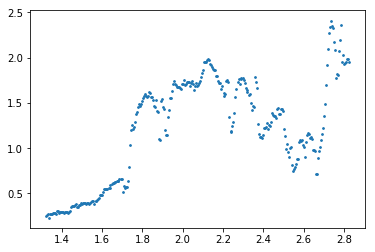

In [44]:
plt.figure()
plt.plot(sink_gas_and_star_data[sink_array]["time"][0][3:]*3.17098e-14,
            sink_gas_and_star_data[sink_array]["stars_in_sink"][0][3:],
            label=sink_name
            )


plt.figure()

plt.scatter(sink_gas_and_star_data[sink_array]["time"][0]*3.17098e-14,
            sink_gas_and_star_data[sink_array]["star_mass_sink"][0]*5.0279e-34,
            label='Star mass',
            s=5
            )
plt.scatter(sink_gas_and_star_data[sink_array]["time"][0]*3.17098e-14, 
            sink_gas_and_star_data[sink_array]["sink_mass"][0]*5.0279e-34,
            label='Sink mass',
            s=1)
plt.scatter(sink_gas_and_star_data[sink_array]["time"][0]*3.17098e-14, 
            sink_gas_and_star_data[sink_array]["gas_mass"][0]*5.0279e-34,
            label='Gas mass',
            s=1)
#plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14,sink_gas_data["gas_mass"].mean()*5.0279e-34,label='Avg gas',s=1)
#plt.xlim(1.3, 2.0)
#plt.ylim(-5, 40)
plt.title('Stellar Mass Insided of Augmented Sink')
plt.xlabel('Time (Myr)')
plt.ylabel('Mass M$_\odot$')
plt.legend()
plt.show()

#calculate stars/cubic parsec
sink_vol = (4./3) * np.pi * 0.08523**3
stars_in_aug_sink = sink_gas_and_star_data[sink_array]["stars_in_sink"][0]
stellar_density = stars_in_aug_sink/sink_vol

print 'max stellar number density in sink: ', stellar_density.max(), "per pc^3"

gas_mass_in_aug_sink = sink_gas_and_star_data[sink_array]["gas_mass"][0]*5.0279e-34
star_mass_in_aug_sink = sink_gas_and_star_data[sink_array]["star_mass_sink"][0]*5.0279e-34
aug_sink_mass = sink_gas_and_star_data[sink_array]["sink_mass"][0]*5.0279e-34
tot_mass_in_sink = gas_mass_in_aug_sink + stars_in_aug_sink + aug_sink_mass

sink_mass_density = tot_mass_in_sink/sink_vol

print 'max stellar mass density in sink: ', star_mass_in_aug_sink.max()/sink_vol, 'Msun/pc^3'
print 'max total mass density in sink: ', sink_mass_density.max()
mean_gas_mass = sink_gas_and_star_data[sink_array]["gas_mass"][0].mean()*5.0279e-34
mean_gas_dens = mean_gas_mass / sink_vol
print 'mean gas dens: ', mean_gas_dens

# Calculating Virial Velocity
G = 6.67e-11 #SI
rad_sink = 2.629923e+15 #meters
tot_mass_in_sink_kg = tot_mass_in_sink / 5.0279000132e-31
v_vir = np.sqrt((3./5)*G*tot_mass_in_sink_kg/rad_sink) / 1000 # km/s

plt.figure()
plt.scatter(sink_gas_and_star_data[sink_array]["time"][0]*3.17098e-14, v_vir, s=3)
plt.show()

# Look at star to gas to sink mass distributions in sink cluster away from coud center [-1.5, 3.1, 2.9]pc

Want to see if the overwhelming stellar mass within the sink particles is present here too.

In [235]:
sink_name7 = '65555.0'
sink_name8 = '393235.0'
sink_name9 = '6029331.0'
sink_name10 = '1900562.0'

sink_array7 = np.where(sink_gas_and_star_data['name'] == sink_name7)
sink_array8 = np.where(sink_gas_and_star_data['name'] == sink_name8)
sink_array9 = np.where(sink_gas_and_star_data['name'] == sink_name9)
sink_array10 = np.where(sink_gas_and_star_data['name'] == sink_name10)


sink_65555 = sink_gas_and_star_data[sink_array7]["time"][0]
sink_65555[ sink_65555==0.0 ] = np.nan
sink_393235 = sink_gas_and_star_data[sink_array8]["time"][0]
sink_393235[ sink_393235==0.0 ] = np.nan
sink_6029331 = sink_gas_and_star_data[sink_array9]["time"][0]
sink_6029331[ sink_6029331==0.0 ] = np.nan
sink_1900562 = sink_gas_and_star_data[sink_array10]["time"][0]
sink_1900562[ sink_1900562==0.0 ] = np.nan

def plt_mass_components(sink_tag):
    sink_arr = np.where(sink_gas_and_star_data['name'] == sink_tag)
    
    sink_arr_change = sink_gas_and_star_data[sink_arr]["time"][0]
    sink_arr_change[ sink_arr_change==0.0 ] = np.nan
    plt.figure(figsize=(8,4))
    plt.scatter(sink_gas_and_star_data[sink_arr]["time"][0]*3.17098e-14,
            sink_gas_and_star_data[sink_arr]["star_mass_sink"][0]*5.0279e-34,
            label='Star mass',
            s=5
            )
    plt.scatter(sink_gas_and_star_data[sink_arr]["time"][0]*3.17098e-14, 
            sink_gas_and_star_data[sink_arr]["sink_mass"][0]*5.0279e-34,
            label='Sink mass',
            s=1)
    plt.scatter(sink_gas_and_star_data[sink_arr]["time"][0]*3.17098e-14, 
            sink_gas_and_star_data[sink_arr]["gas_mass"][0]*5.0279e-34,
            label='Gas mass',
            s=1)
    plt.title('Stellar Mass Insided of Sink: ' + sink_tag)
    plt.xlabel('Time (Myr)')
    plt.ylabel('Mass M$_\odot$')
    plt.tick_params(axis='both', which='both', direction="in")
    plt.xlim(1.65,2.9)
    plt.legend()
    plt.show()
    
def plt_mass_components_subplots(sink_tag_list, save_fig):
    rows = len(sink_tag_list)
    columns = 1
    fig, ax = plt.subplots(rows, columns, sharex='col', sharey='row', figsize=(10,20))

    for ind, sink_tag in enumerate(sink_tag_list):
        sink_arr = np.where(sink_gas_and_star_data['name'] == sink_tag)
        
        ax[ind].scatter(sink_gas_and_star_data[sink_arr]["time"][0]*3.17098e-14,
                        sink_gas_and_star_data[sink_arr]["star_mass_sink"][0]*5.0279e-34,
                        label='Star mass',
                        s=5
                       )
        ax[ind].scatter(sink_gas_and_star_data[sink_arr]["time"][0]*3.17098e-14,
                        sink_gas_and_star_data[sink_arr]["sink_mass"][0]*5.0279e-34,
                        label='Sink mass',
                        s=5
                       )
        ax[ind].scatter(sink_gas_and_star_data[sink_arr]["time"][0]*3.17098e-14,
                        sink_gas_and_star_data[sink_arr]["gas_mass"][0]*5.0279e-34,
                        label='Gas mass',
                        s=5
                       )
        ax[ind].yaxis.set_minor_locator(MultipleLocator(5))
        ax[ind].tick_params(axis='both', which='both', direction="in")
        ax[ind].tick_params(axis="both", which="major", length=5)
        ax[ind].set_ylim(-10,135)
        ax[ind].yaxis.grid(color='gray', linestyle='dashed')
        ax[ind].set_ylabel("Sink " + str(ind+1) + " (M$_\odot$)")
        ax[len(sink_tag_list)-1].set_xlabel("Time (Myr)")
        ax[0].legend()
        ax[0].set_title('Mass components of central sink cluster')
    if (save_fig[0]):
        plt.savefig(save_fig[1])
        print "Saved Figure: ", save_fig[1]
    else:
        plt.show()

In [220]:
sink_tag_list = ['65555.0', '393235.0', '6029331.0', '1900562.0']
plt_mass_components_subplots(sink_tag_list, save_fig=(False, './off-center-cluster.png'))

#plt_mass_components('65555.0')
#plt_mass_components('393235.0')
#plt_mass_components('6029331.0')
#plt_mass_components('1900562.0')

Saved Figure:  ./off-center-cluster.png


In [237]:

sink_tag_list = ['65541.0', '196613.0', '1441807.0', '17039371.0', '18153483.0', '7340046.0']
plt_mass_components_subplots(sink_tag_list, save_fig=(True, './center-cluster.png'))

Saved Figure:  ./center-cluster.png


# Look at star to gas to sink mass distributions in loner sink 
32112379.0 [1.00199, -3.1411685, 2.83684499]pc ; 3.3 parsecs from "main" central cluster

and 65544.0 [-2.1168824, 3.3954114, 1.1628393]pc ; 4.45 parsecs from "main" central cluster, ends 1.5pc from other cluster

In [52]:
sink_name11 = '3211279.0'
sink_name12 = '65544.0'


sink_array11 = np.where(sink_gas_and_star_data['name'] == sink_name11)
sink_array12 = np.where(sink_gas_and_star_data['name'] == sink_name12)


sink_3211279 = sink_gas_and_star_data[sink_array11]["time"][0]
sink_3211279[ sink_3211279==0.0 ] = np.nan
sink_65544 = sink_gas_and_star_data[sink_array12]["time"][0]
sink_65544[ sink_65544==0.0 ] = np.nan

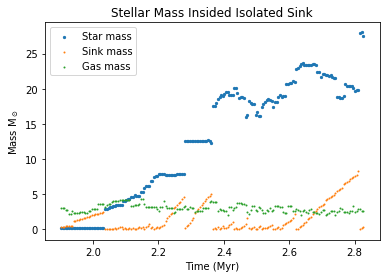

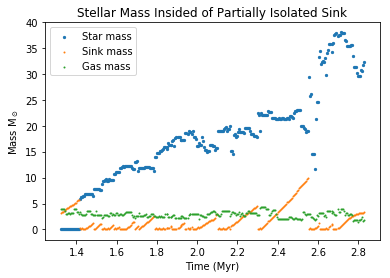

In [54]:
plt.figure()

plt.scatter(sink_gas_and_star_data[sink_array11]["time"][0]*3.17098e-14,
            sink_gas_and_star_data[sink_array11]["star_mass_sink"][0]*5.0279e-34,
            label='Star mass',
            s=5
            )
plt.scatter(sink_gas_and_star_data[sink_array11]["time"][0]*3.17098e-14, 
            sink_gas_and_star_data[sink_array11]["sink_mass"][0]*5.0279e-34,
            label='Sink mass',
            s=1)
plt.scatter(sink_gas_and_star_data[sink_array11]["time"][0]*3.17098e-14, 
            sink_gas_and_star_data[sink_array11]["gas_mass"][0]*5.0279e-34,
            label='Gas mass',
            s=1)

#plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14,sink_gas_data["gas_mass"].mean()*5.0279e-34,label='Avg gas',s=1)
#plt.xlim(1.3, 2.0)
#plt.ylim(-5, 40)
plt.title('Stellar Mass Insided Isolated Sink')
plt.xlabel('Time (Myr)')
plt.ylabel('Mass M$_\odot$')
plt.legend()
plt.show()

plt.figure()

plt.scatter(sink_gas_and_star_data[sink_array12]["time"][0]*3.17098e-14,
            sink_gas_and_star_data[sink_array12]["star_mass_sink"][0]*5.0279e-34,
            label='Star mass',
            s=5
            )
plt.scatter(sink_gas_and_star_data[sink_array12]["time"][0]*3.17098e-14, 
            sink_gas_and_star_data[sink_array12]["sink_mass"][0]*5.0279e-34,
            label='Sink mass',
            s=1)
plt.scatter(sink_gas_and_star_data[sink_array12]["time"][0]*3.17098e-14, 
            sink_gas_and_star_data[sink_array12]["gas_mass"][0]*5.0279e-34,
            label='Gas mass',
            s=1)

#plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14,sink_gas_data["gas_mass"].mean()*5.0279e-34,label='Avg gas',s=1)
#plt.xlim(1.3, 2.0)
#plt.ylim(-5, 40)
plt.title('Stellar Mass Insided of Partially Isolated Sink')
plt.xlabel('Time (Myr)')
plt.ylabel('Mass M$_\odot$')
plt.legend()
plt.show()

In [7]:
# plot average sink mass and average gas mass over time
mass_sink = 0.0
counter = 1
sink_avg_list = []
for i in np.arange(1,len(sink_gas_and_star_data['name'])):
    
    sink_mass_inst = sink_gas_and_star_data["sink_mass"][i][0][i]
    #print sink_mass_inst
    if sink_mass_inst > 1.0:
        
        mass_sink += sink_mass_inst
        counter += 1
    sink_avg = mass_sink / counter
    sink_avg_list.append(sink_avg)
    mass_sink = 0.0
    counter = 1
    for j in np.arange(0, len(sink_gas_and_star_data["sink_mass"][i][0])):
        #mass_sink += sink_gas_and_star_data["sink_mass"][i][0][j]
        #sink_avg = mass_sink.mean()
        #print sink_gas_and_star_data["sink_mass"][i]
    #sink_avg_list.append(sink_avg)
        
    #if sink_gas_and_star_data["particle_mass"][i]
#print sink_gas_and_star_data["sink_mass"][1:-1]
#print sink_gas_and_star_data["time"]



IndentationError: expected an indented block (<ipython-input-7-ebbf449fa8ba>, line 26)

In [15]:
#print sink_gas_and_star_data["sink_mass"][1][0:1]
#print sink_gas_and_star_data["sink_mass"]
#plt.plot(sink_gas_and_star_data[sink_array]["time"][0]*3.17098e-14, sink_avg_list)
#sink_gas_and_star_data['star_mass_sink']
#print sink_gas_and_star_data['stars_in_sink']


In [16]:
radius = (2.5e17, "cm")
print radius
radius = (2*2.5e17, "cm")
print radius

(2.5e+17, 'cm')
(5e+17, 'cm')


In [17]:
sink_gas_data = pickle.load(open('./pickles/gas_around_sinks_data.pickle', 'rb'))

(array([7]), array([0]))


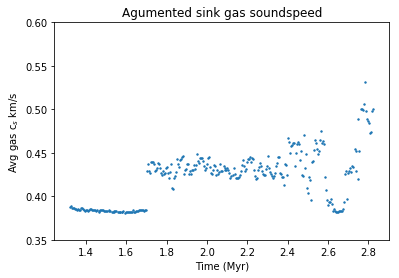

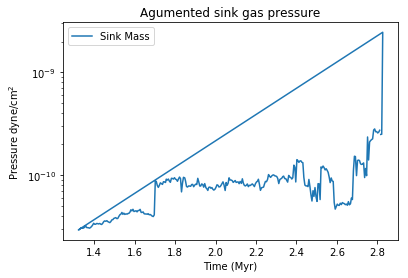

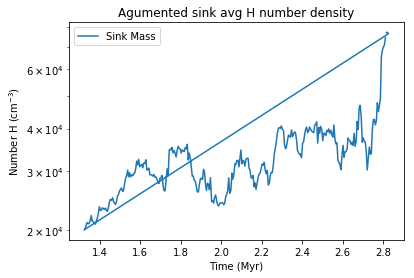

In [18]:
sink_name = '65541.0'
plt.figure()
sink_array = np.where(sink_gas_data['name'] == sink_name)
print sink_array
#print sink_gas_data[sink_array]["sink_accr"][0]
plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14, 
            sink_gas_data[sink_array]["gas_cs"][0]*1e-5, 
            s=2)
#plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14, 
#            sink_gas_data[sink_array]["gas_mass"][0]*5.0279e-34,
#            label='Gas Mass', 
#            s=2)
plt.ylim(0.35, 0.6)
plt.title('Agumented sink gas soundspeed')
plt.xlabel('Time (Myr)')
plt.ylabel('Avg gas c$_{s}$ km/s')
plt.legend()
plt.show()

plt.figure()
sink_array = np.where(sink_gas_data['name'] == sink_name)
#print sink_gas_data[sink_array]["sink_accr"][0]
plt.semilogy(sink_gas_data[sink_array]["time"][0]*3.17098e-14, 
            sink_gas_data[sink_array]["gas_pres"][0], 
            label='Sink Mass')
#plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14, 
#            sink_gas_data[sink_array]["gas_mass"][0]*5.0279e-34,
#            label='Gas Mass', 
#            s=2)
#plt.ylim(-0.0001,0.0001)
plt.title('Agumented sink gas pressure')
plt.xlabel('Time (Myr)')
plt.ylabel('Pressure dyne/cm$^2$')
plt.legend()
plt.show()

plt.figure()
sink_array = np.where(sink_gas_data['name'] == sink_name)
#print sink_gas_data[sink_array]["sink_accr"][0]
plt.semilogy(sink_gas_data[sink_array]["time"][0]*3.17098e-14, 
            sink_gas_data[sink_array]["gas_dens"][0]/1.67e-24, 
            label='Sink Mass')
#plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14, 
#            sink_gas_data[sink_array]["gas_mass"][0]*5.0279e-34,
#            label='Gas Mass', 
#            s=2)
#plt.ylim(-0.0001,0.0001)
plt.title('Agumented sink avg H number density')
plt.xlabel('Time (Myr)')
plt.ylabel('Number H (cm$^{-3}$)')
plt.legend()
plt.show()

In [19]:
#print sink_gas_data['gas_pres'][7]

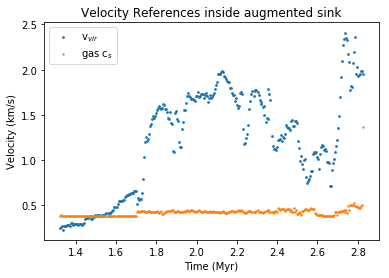

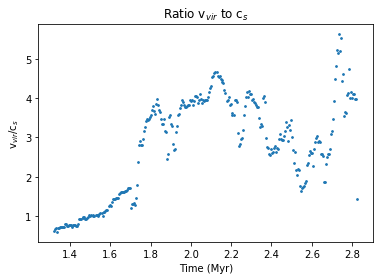

In [32]:
# Calculating Virail Velocity of a sink
# M_vir = M_gas + M_stars + M_sink
# Calculating Virial Velocity
G = 6.67e-11 #SI
rad_sink = 2.629923e+15 #meters
tot_mass_in_sink_kg = tot_mass_in_sink / 5.0279000132e-31
v_vir = np.sqrt((3./5)*G*tot_mass_in_sink_kg/rad_sink) / 1000 # km/s

plt.figure()
plt.scatter(sink_gas_and_star_data[sink_array]["time"][0]*3.17098e-14, 
            v_vir, 
            label='v$_{vir}$',
            s=3)
plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14, 
            sink_gas_data[sink_array]["gas_cs"][0]*1e-5,
            label='gas c$_{s}$',
            s=2)
plt.title('Velocity References inside augmented sink')
plt.legend()
plt.xlabel('Time (Myr)')
plt.ylabel('Velocity (km/s)')
plt.show()

ratio_vvir_cs = v_vir / (sink_gas_data[sink_array]["gas_cs"][0]*1e-5)

plt.figure()
plt.scatter(sink_gas_and_star_data[sink_array]["time"][0]*3.17098e-14, 
            ratio_vvir_cs,
            s=3)

plt.title('Ratio v$_{vir}$ to c$_{s}$')
plt.xlabel('Time (Myr)')
plt.ylabel('v$_{vir}$/c$_{s}$')
plt.show()